In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
url="https://drive.google.com/file/d/1CCwMErhA8y7_IDBl7MlqfCPUt3hb87CP/view?usp=drive_link"
url="https://drive.google.com/uc?id=" + url.split("/")[-2]
df = pd.read_csv(url)

In [2]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [4]:
online_delivery_percentage = df["Has Online delivery"].value_counts().get('Yes', 0)
print(f"Percentage of restaurants offering online delivery:",online_delivery_percentage)

Percentage of restaurants offering online delivery: 2451


In [9]:
no_online_delivery_count = df["Has Online delivery"].value_counts().get(0, 0)
print(f"Restaurants with no online delivery: {no_online_delivery_count}")

Restaurants with no online delivery: 7100


C:\Users\suren\AppData\Local\Temp\ipykernel_33452\2853794358.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_online_delivery_count = df["Has Online delivery"].value_counts().get(0, 0)


In [15]:
df["Has Online delivery"] = df["Has Online delivery"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0}).fillna(0).astype(int)

In [17]:
row_count = len(df)
online_delivery = df["Has Online delivery"].sum()
percentage_of_online_delivery = round((online_delivery / row_count) * 100, 2)
print(f"Total % of Online Delivery: {percentage_of_online_delivery}%")

Total % of Online Delivery: 25.66%


In [20]:
row_count = len(df)
online_delivery = df["Has Online delivery"].sum()
no_online_delivery = row_count - online_delivery

In [21]:
percentage_of_no_online_delivery = round((no_online_delivery / row_count) * 100, 2)
print(f"Total % where Online Delivery is not present: {percentage_of_no_online_delivery}%")

Total % where Online Delivery is not present: 74.34%


In [24]:
avg_rating_with_delivery = df[df["Has Online delivery"] == 1]["Aggregate rating"].astype(float).mean()
print(f"Average rating of restaurants with online delivery: {avg_rating_with_delivery:.2f}")

Average rating of restaurants with online delivery: 3.25


In [25]:
avg_rating_without_delivery = df[df["Has Online delivery"] == 0]["Aggregate rating"].astype(float).mean()
print(f"Average rating of restaurants without online delivery: {avg_rating_without_delivery:.2f}")

Average rating of restaurants without online delivery: 2.47


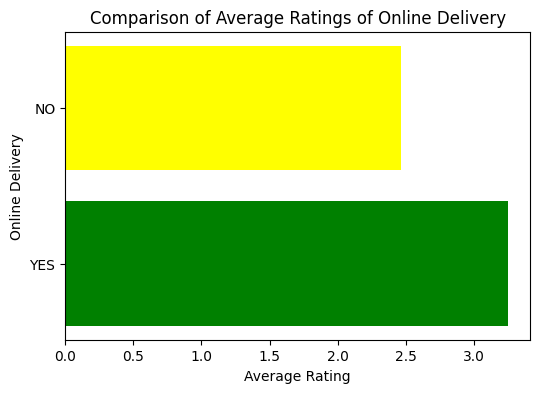

In [27]:
labels = ["YES", "NO"]
average_ratings = [avg_rating_with_delivery, avg_rating_without_delivery]
colors = ["green", "yellow"]

plt.figure(figsize=(6, 4))
plt.barh(labels, average_ratings, color=colors)
plt.ylabel("Online Delivery")
plt.xlabel("Average Rating")
plt.title("Comparison of Average Ratings of Online Delivery")
plt.show()